In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_rows=1000

In [97]:
accounts = pd.read_csv('account_dat.csv')
apps=pd.read_csv('app_dat.csv')
in_app_cont=pd.read_csv('in-app_dat.csv')
devices=pd.read_csv('device_ref.csv')
categories=pd.read_csv('category_ref.csv')
trans=pd.read_csv('transaction_dat.csv')

accounts.create_dt = pd.to_datetime(accounts.create_dt)
trans.create_dt = pd.to_datetime(trans.create_dt)

accounts['year_month'] = pd.to_datetime(accounts.create_dt).dt.to_period('M')
trans['year_month'] = pd.to_datetime(trans.create_dt).dt.to_period('M')

#rename vars to more logical names
accounts=accounts.rename(columns={'create_dt':'install_dt'})
categories=categories.rename(columns={'category_name':'app_category'})
apps=apps.rename(columns={'content_id':'app_id'})
in_app_cont=in_app_cont.rename(columns={'parent_app_content_id':'app_id','type':'content_type'})
trans=trans.rename(columns={'device_id':'purchase_device_id'})

# accounts['year'] = pd.to_datetime(accounts.create_dt).dt.year

In [ ]:
print(accounts.isnull().sum())
print(trans.isnull().sum())

In [196]:
print(accounts.shape)
accounts.head()

(100000, 3)


,acct_id,create_dt,payment_type
0,eb23e449d274bddb,2012-04-03,PMOF
1,3d60dcb8494a0d70,2009-08-31,PMOF
2,9b6d6fbf76504d85,2008-11-06,PMOF
3,343255370828b380,2012-01-03,PMOF
4,664e27f05189c387,2010-10-31,PMOF


In [51]:
accounts.acct_id.nunique()

100000

In [7]:
accounts.groupby('payment_type').payment_type.count()

payment_type
Free only    50000
PMOF         50000
Name: payment_type, dtype: int64

In [16]:
print(trans.shape)
trans.head()

(3607509, 6)


,create_dt,content_id,acct_id,price,device_id,year_month
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,1,2016-08
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2,2016-09
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2,2016-08
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2,2016-06
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2,2016-06


<AxesSubplot:xlabel='year_month'>

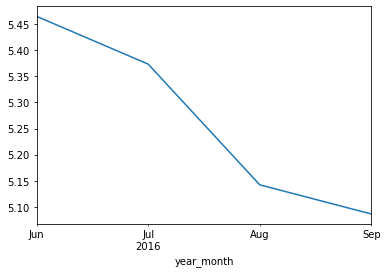

In [21]:
trans.groupby('year_month').price.mean().plot()

### Map transactions to app_id and installs

In [114]:
trans.content_id.nunique()

2913

In [50]:
trans.acct_id.nunique()

30000

In [109]:
trans_dev=pd.merge(trans,devices,left_on='purchase_device_id',right_on='device_id',how='left')\
.drop(['device_id','purchase_device_id'],axis=1)\
.rename(columns={'device_name':'purchase_device_name'})

trans_dev.head()

,create_dt,content_id,acct_id,price,year_month,purchase_device_name
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,2016-08,iPhone
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2016-09,iPad
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2016-08,iPad
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2016-06,iPad
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2016-06,iPad


In [116]:
print(trans.content_id.nunique())
print(in_app_cont.content_id.nunique())

2913
2376


In [122]:
trans_content_ids=set(trans.content_id.unique())
app_dat_content_ids=set(in_app_cont.content_id.unique())
len(trans_content_ids & app_dat_content_ids)

2376

In [127]:
2913-2376

537

In [13]:
print(trans.shape)


(3607509, 6)


In [78]:
print(in_app_cont.shape)
in_app_cont.head()

(2376, 3)


,app_id,content_id,content_type
0,d2bde35599e0dae9,227227a77c59809b,consumable
1,d2bde35599e0dae9,41ac2362a2600185,consumable
2,d2bde35599e0dae9,64a8e16f030bb611,consumable
3,d2bde35599e0dae9,2c8ba424183afa7c,consumable
4,d2bde35599e0dae9,b4c42fa5cc420f7b,consumable


In [81]:
in_app_cont.groupby('content_type').content_type.count()

content_type
consumable      2107
subscription     269
Name: content_type, dtype: int64

In [84]:
in_app_cont.app_id.nunique()

476

In [85]:
in_app_cont.content_id.nunique()

2376

In [56]:
categories

,app_category,category_id
0,Games,Z-1
1,Social Networking,Q-5
2,Utilities,M-7
3,Entertainment,Q-1
4,Photos & Videos,Y-8


In [197]:
devices

,device_name,device_id
0,iPhone,1
1,iPad,2
2,Both,3


In [87]:
print(apps.shape)
apps.head()

(1000, 4)


,app_name,app_id,category_id,device_id
0,half-slouched having,22dfac9721b899cb,Y-8,3
1,lift whale-ships,7c645810cd7f166e,M-7,3
2,mightily community,c495bcb878faffaa,Y-8,2
3,session: too--shall,4e683dcd461cdd22,Y-8,1
4,That Zoology,6473dd29a2badbf1,Y-8,3


In [88]:
apps.app_id.nunique()

1000

In [76]:
print("apps_shape: "+str(apps.shape))

app_categ=pd.merge(apps,categories,on='category_id',how='left').drop('category_id',axis=1)
# app_categ.head()
print("app_categ_shape: "+str(app_categ.shape))
app_categ_dev=pd.merge(app_categ,devices,on='device_id',how='left').drop('device_id',axis=1)
print("app_categ_dev_shape: "+str(app_categ_dev.shape))
app_categ_dev.head()
app_master=pd.merge(app_categ_dev,in_app_cont,on='app_id',how='left')
print("app_master_shape: "+str(app_master.shape))
app_master.head()

apps_shape: (1000, 4)
app_categ_shape: (1000, 4)
app_categ_dev_shape: (1000, 4)
app_master_shape: (2900, 6)


,app_name,app_id,app_category,device_name,content_id,content_type
0,half-slouched having,22dfac9721b899cb,Photos & Videos,Both,f049e141e84edd84,consumable
1,lift whale-ships,7c645810cd7f166e,Utilities,Both,ef891bdc2d651c70,consumable
2,mightily community,c495bcb878faffaa,Photos & Videos,iPad,107aece323e389df,consumable
3,mightily community,c495bcb878faffaa,Photos & Videos,iPad,77389dc3f8108c77,consumable
4,session: too--shall,4e683dcd461cdd22,Photos & Videos,iPhone,abfa638eb85a98f3,consumable


In [94]:
app_master.content_id.isnull().sum()

524

In [95]:
app_master.isnull().sum()

app_name          0
app_id            0
app_category      0
device_name       0
content_id      524
content_type    524
dtype: int64

In [110]:
trans_master = pd.merge(trans_dev,app_master,on='content_id',how='left')
trans_master.head()

,create_dt,content_id,acct_id,price,year_month,purchase_device_name,app_name,app_id,app_category,device_name,content_type
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,2016-08,iPhone,events Bildad's,61cea77b9bc843d1,Utilities,Both,subscription
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2016-09,iPad,swell questionably,1f0ebd67df5846cd,Utilities,Both,consumable
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2016-08,iPad,supperless--my Shipmates,1383e4f2f49f0f44,Games,iPad,consumable
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2016-06,iPad,unwritten hungry,8590a25d4e5c249c,Games,iPad,consumable
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2016-06,iPad,Turning thanked,478e10f9248b7842,Entertainment,Both,consumable


In [130]:
print("trans_shape: "+str(trans_dev.shape))
print("trans_master_shape: "+str(trans_master.shape))
trans_master.isnull().sum()

trans_shape: (3607509, 6)
trans_master_shape: (3607509, 11)


create_dt                     0
content_id                    0
acct_id                       0
price                         0
year_month                    0
purchase_device_name          0
app_name                1594364
app_id                  1594364
app_category            1594364
device_name             1594364
content_type            1594364
dtype: int64

In [126]:
len(trans_master.content_id[trans_master.app_id.isnull()].unique())

537

In [132]:
master = pd.merge(trans_master, accounts.drop('year_month',axis=1) , on = 'acct_id', how='left' )
master.head()

,create_dt,content_id,acct_id,price,year_month,purchase_device_name,app_name,app_id,app_category,device_name,content_type,install_dt,payment_type
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,2016-08,iPhone,events Bildad's,61cea77b9bc843d1,Utilities,Both,subscription,2009-08-29,PMOF
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2016-09,iPad,swell questionably,1f0ebd67df5846cd,Utilities,Both,consumable,2011-05-28,PMOF
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2016-08,iPad,supperless--my Shipmates,1383e4f2f49f0f44,Games,iPad,consumable,2009-11-15,PMOF
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2016-06,iPad,unwritten hungry,8590a25d4e5c249c,Games,iPad,consumable,2009-03-01,PMOF
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2016-06,iPad,Turning thanked,478e10f9248b7842,Entertainment,Both,consumable,2010-10-01,PMOF


In [134]:
print("trans_master_shape: "+str(trans_master.shape))
print("master_shape: "+str(master.shape))
master.isnull().sum()

trans_master_shape: (3607509, 11)
master_shape: (3607509, 13)


create_dt                     0
content_id                    0
acct_id                       0
price                         0
year_month                    0
purchase_device_name          0
app_name                1594364
app_id                  1594364
app_category            1594364
device_name             1594364
content_type            1594364
install_dt                 2742
payment_type               2742
dtype: int64